# Multiple Linear Regression-Economics Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# drop unnecessary columns only interest rate and unemployment_rate is required
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# check null
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

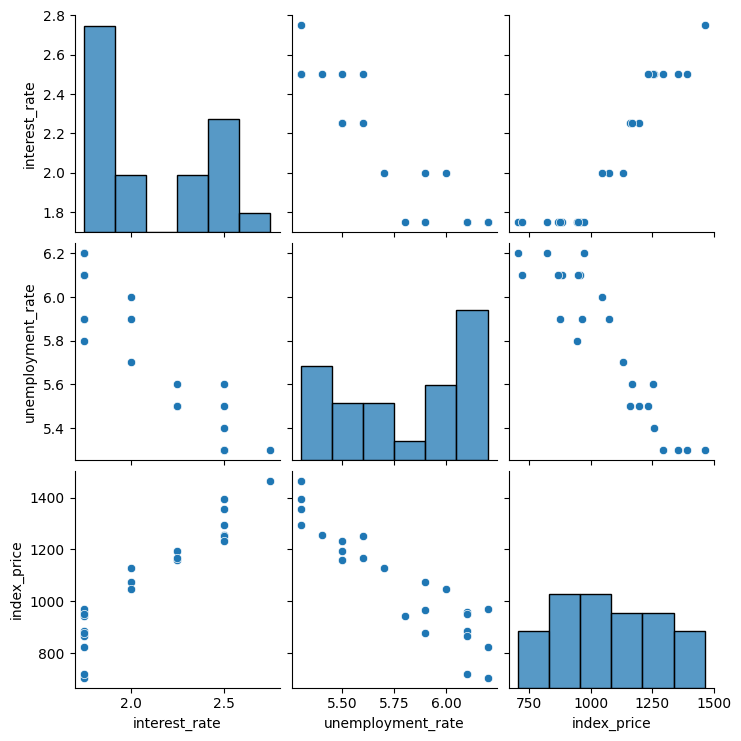

In [7]:
# visualization we do now
sns.pairplot(df)

In [8]:
df.corr()#we see that the 2 independent are ulta to diff

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

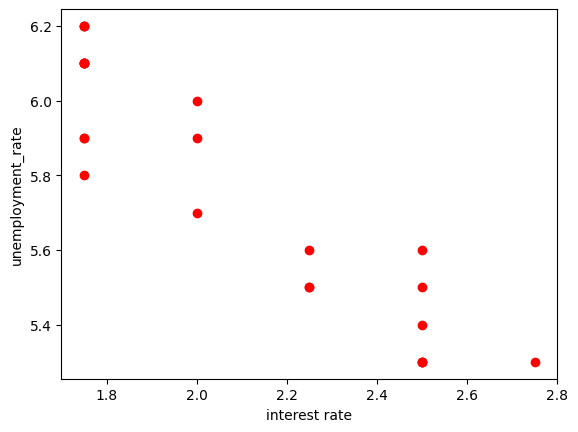

In [10]:
## visualize the data points more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployment_rate')
# we see is the inverse relationship

In [12]:
## get the independent and Dependent features
X = df[['interest_rate','unemployment_rate']]
x= df.iloc[:,:-1]
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

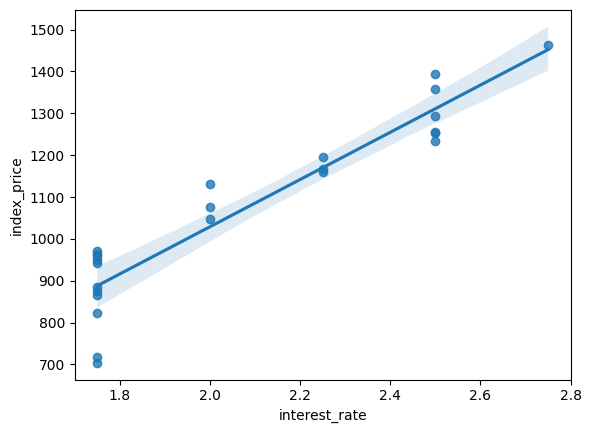

In [19]:
#making the plot -new one and better
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

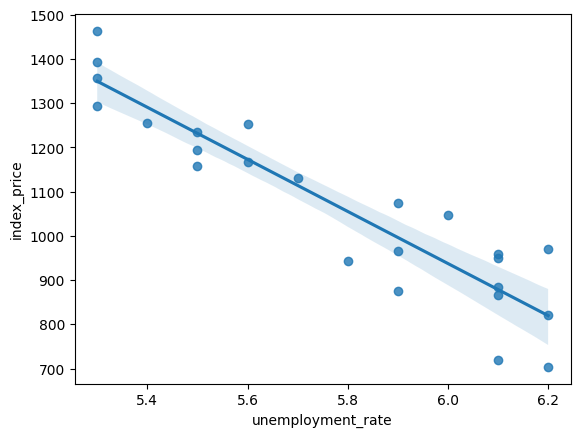

In [20]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
# Cross Val Score - is for cross validation of model
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

# so when we give cv the train is divided to train and validation and on every time that much of train is put to test and then scoring is done

In [35]:
print(reg.coef_)
print(reg.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [25]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [26]:
## prediction 
y_pred = reg.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8278978091457145


In [29]:
n = len(x_test)
p = x_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)#formula for the adjusted r2
print(adj_r2)

0.7131630152428576


# Assumptions


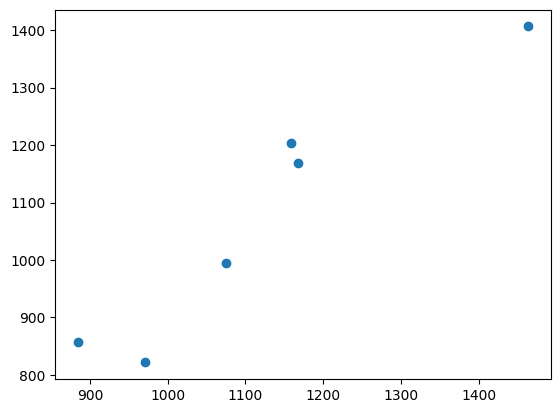

In [30]:
plt.scatter(y_test,y_pred)

In [31]:
residuals = y_test-y_pred
print(residuals)#this is the error

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


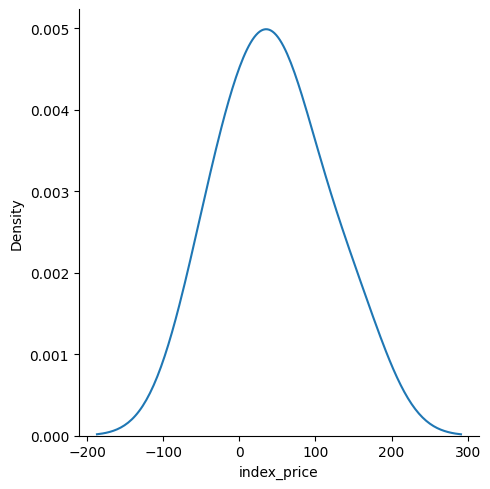

In [33]:
#plot this residuals 
sns.displot(residuals,kind = 'kde')# when does this we say that residual is following the normal distribution we get then the model is good


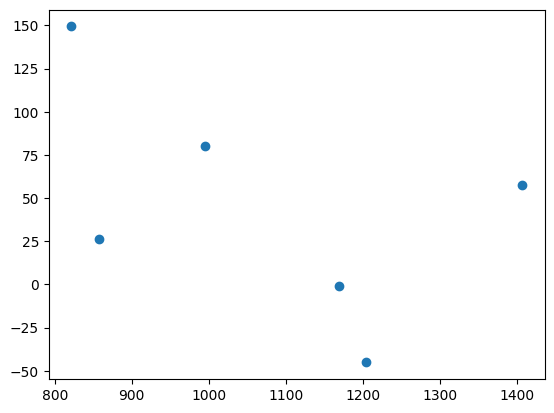

In [34]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [36]:
# doing OLS
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
prediction  = model.predict(x_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [37]:
model.summary()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                       0.754
Time:                        11:40:30   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# learning
new assumptions,the residuals,seeing plots and corr of each
shd learn if multicolinearity then how elimination and all